In [22]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt  # a library to plot nice graphs. plt is just a short alias
plt.style.use('ggplot')      
x=np.concatenate([np.random.uniform(low=0.0, high=2*math.pi, size=8),[0, 2*math.pi]])
np.sort(x)
y=np.vectorize(math.sin)(x)
z=np.vectorize(math.cos)(x)
full_df = pd.DataFrame(dict(x=x,y=y,z=z))
missing_x = np.random.uniform(low=0.0, high=2*math.pi, size=40)
missing_df = pd.DataFrame(dict(x=missing_x, y=np.nan, z=np.nan))
df=pd.concat([full_df, missing_df]).sort_values('x').reset_index().sample(frac=1)

In [ ]:
df.to_csv('interpolate.csv', index=False)

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/missingness_tutorial')

In [23]:
surnames = pd.read_csv('../surnames.csv').dropna().drop_duplicates()

In [24]:
surnames.to_csv('scrub.csv', index=False)

In [25]:
cleaned=pd.DataFrame(pd.concat([surnames['Mandarin'],surnames['Unnamed: 1']]).drop_duplicates())

In [26]:
surnames=cleaned[0].str.normalize('NFKD').str.encode('ascii',errors='ignore').str.decode('utf-8').str.replace('[0-9]','',regex=True).drop_duplicates().to_list()

In [27]:
from anonymizer import Anonymizer


In [28]:
Anonymizer().get_first_name()

'Calvin'

In [29]:
import random
last=random.choices(surnames, k=100)

In [30]:
an=Anonymizer()
first=[an.get_first_name () for each in range(0, 100)]   

In [31]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [87]:
probability = [5.5-math.fabs(5.5-i) for i in range(1,11)]

In [88]:
probability[3]*=.25
probability[9]*=.25
probability[7]*=4
probability[5]*=4

In [89]:
import random
numbers= random.choices(list(range(1,11)), k=100, weights=probability)

In [90]:
sample_frame = pd.DataFrame(dict(first_name=first, last_name=last, number = numbers)).astype({'number': int})

In [91]:
sample_frame.number.value_counts()

6     43
8     23
5     11
7      8
2      6
3      3
9      3
1      1
10     1
4      1
Name: number, dtype: int64

In [95]:
sample_frame.to_csv('favorite_numbers_full.csv', index=False)

<AxesSubplot:>

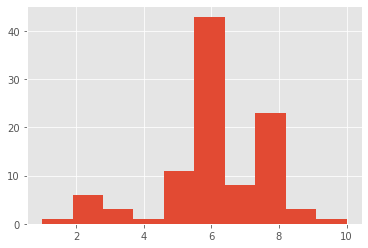

In [96]:
sample_frame.number.hist()

In [97]:
sample_frame[['first_name', 'number']].to_csv('favorite_numbers.csv', index=False)

In [116]:
rand = np.random.uniform(0, 1, size=len(sample_frame))
clobbered = sample_frame.copy()  # We copy to avoid clobbering the original
clob = clobbered['number']%2 == 0
clob *= 0.2
clobbered['number'] = np.where(clob < rand, clobbered['number'], np.nan)

In [117]:
clobbered.isnull().sum()

first_name     0
last_name      0
number        15
dtype: int64

In [118]:
clobbered[['first_name', 'number']].to_csv('favorite_numbers.csv', index=False)

In [119]:
clobbered.to_csv('favorite_numbers_full_name.csv', index=False)

In [120]:
from scipy.special import binom

In [121]:
binom(9,1)

9.0

<AxesSubplot:>

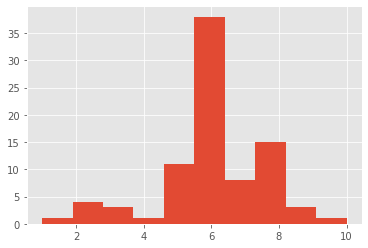

In [122]:
clobbered.number.hist()

In [145]:
glass_df=pd.read_csv('data/glass.csv')

In [154]:
glass_df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.085276,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.085276,1.000000,-0.165744,0.012212,-0.201294,-0.390405,-0.250926,0.381727,-0.172954,0.396389
Mg,-0.122274,-0.165744,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.012212,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.201294,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.390405,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.250926,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.381727,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.172954,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.396389,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [158]:
glass_df.mean()

RI       1.517805
Na      13.364029
Mg       2.684533
Al       1.444907
Si      72.650935
K        0.497056
Ca       8.956963
Ba       0.175047
Fe       0.057009
Type     2.780374
dtype: float64

In [159]:
from helpers import clobber

In [160]:
clobber(glass_df, 'RI', 0.5, depends=['Ca']).to_csv('data/glass_missing.csv', index=False)

In [161]:
glass_df=pd.read_csv('data/glass_missing.csv')

In [162]:
glass_df.mean()

RI       1.517400
Na      13.364029
Mg       2.684533
Al       1.444907
Si      72.650935
K        0.497056
Ca       8.956963
Ba       0.175047
Fe       0.057009
Type     2.780374
dtype: float64